In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [5]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [0]:
data_lm.save()

In [0]:
data = load_data(path)

In [9]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative
"xxbos \n \n i 'm sure things did n't exactly go the same way in the real life of xxmaj homer xxmaj hickam as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" xxmaj october xxmaj sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read xxmaj",positive


In [10]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [11]:
data.train_ds[0][0]

Text xxbos xxmaj look , although we do n't like to admit it , we 've all have to xxunk our fears concerning the extreme likelihood of experiencing the events that take place in this movie . xxmaj you know : you get into your car and you immediately start xxunk , i hope today is n't the day that my xxunk sticks at a comfortable xxunk speed of xxunk xxunk , all four door xxunk break in the locked position , both my main and xxunk xxunk fail , my xxunk switch ca n't be turned off , and i 've got a full tank of gas ; all simultaneously . " xxmaj fortunately , for most of us , our xxmaj xxunk kicks - in before we actually decide that it 's a bad idea to be driving a car . xxmaj not so for the makers of the xxunk , white - knuckle , edge - of - your - seat ( if only in preparation to leave the room ) action xxunk , " xxmaj xxunk xxmaj car " xxmaj but they go ahead and drive anyway ! 
 
  i am endlessly pleased to have found ( thanks to the imdb ) that this movie is real , and that i did n't 

In [12]:
data.train_ds[0][0].data[:10]

array([  2,   5, 213,  10, 266,  93,  62,  36,  51,  15])

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
        .split_from_df(col=2)
        .label_from_df(cols=0)
        .databunch())

In [0]:
bs=48

In [15]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm')]

In [16]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/pos')]

In [0]:
data_lm = (TextList.from_folder(path)
           .filter_by_folder(include=['train', 'test', 'unsup'])
           .split_by_rand_pct(0.1)
           .label_for_lm()
           .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [19]:
data_lm.show_batch()

idx,text
0,"? xxmaj it 's not just the thing that it 's really boring , and without a story , but it seems like they have tried to compensate with as much kinky sex as possible . xxmaj this one sex scene lasted for about 7 minutes , no music , nothing but humping . xxmaj right ... xxmaj xxunk ... xxmaj fast xxmaj forward and ... xxmaj urinating ! xxmaj"
1,1st time almost 7 years since it 's release brought me mixed emotions . i laughed hysterical at most of the scenes xxmaj chris xxmaj farley was in as i have with all of his other starring roles . xxmaj on the other hand i was reminded of how sad it was of his untimely death . i must have avoided this movie because it was released after his death
2,"rule in xxmaj hollywood these days , that every movie must be black even if it 's not . xxmaj no longer can you make a movie for white people , even if it 's ostensibly a white movie ... it 's just not pc . \n \n xxmaj like all bad "" pc "" movies made during the past 10 years , xxmaj the xxmaj shrink xxmaj is"
3,", my beloved xxup weta , who impressed me throughout the years but completely stole my heart after the masterful rendering of all things xxmaj tolkien in the xxmaj lord of the xxmaj rings xxmaj trilogy . i had two reasons for seeing this film . xxmaj one was a 13-year - old boy , the other was my anticipation over what wonders xxup weta would lay at my feet"
4,"xxmaj strawberry "" . xxmaj meanwhile , xxmaj eliza has met up with the xxmaj pickles family dog , xxmaj spike ( xxmaj bruce xxmaj willis ) who wants to get them back to the parents . xxmaj eventually all characters are brought together , after some small moments of adventure , and they do manage to sort everything out . xxmaj also starring xxmaj the xxmaj pretenders ' xxmaj"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult= 0.3)

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


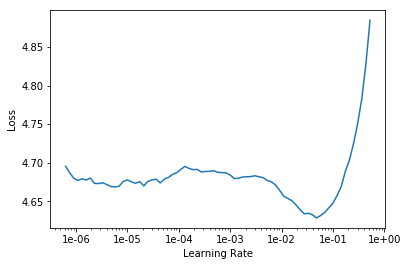

In [35]:
learn.recorder.plot(skip_end=15)

In [36]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.164424,4.017863,0.295380,1:29:51


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

In [0]:
learn.unfreeze()

In [40]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.781724,3.730034,0.329217,1:40:38


Here we trained just one epoch but normally we  can train the model for 10 epoch. Due to time limitation we prefer one epoch.

In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = 'Good morning sunshine'
N_WORDS = 12
N_SENTENCES = 1

In [60]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Good morning sunshine . Good at night . Late . Our


In [0]:
learn.save_encoder('fine_tuned_enc')

In [0]:
path = untar_data(URLs.IMDB)

In [0]:
data_class = (TextList.from_folder(path, vocab=data_lm.vocab)
             .split_by_folder(valid='test')
             .label_from_folder(classes=['neg', 'pos'])
             .databunch(bs=bs))

data_class.save('data_clas.pkl')

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [71]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj here are the matches . . . ( adv . = advantage ) \n \n xxmaj the xxmaj warriors ( xxmaj ultimate xxmaj warrior , xxmaj texas xxmaj tornado and xxmaj legion of xxmaj doom ) v xxmaj the xxmaj perfect xxmaj team ( xxmaj mr xxmaj perfect , xxmaj ax , xxmaj smash and xxmaj crush of xxmaj demolition ) : xxmaj ax is the first",neg
"xxbos xxmaj jim xxmaj carrey is back to much the same role that he played in xxmaj the xxmaj mask , a timid guy who is trying to get ahead in the world but who seems to be plagued with bad luck . xxmaj even when he tries to help a homeless guy from being harassed by a bunch of hoodlums ( and of course they have to be xxmaj",pos
"xxbos xxmaj director xxmaj douglas xxmaj sirk once said ` there 's a very short distance between high art and trash , and trash that contains craziness is by this very quality nearer to art ' . xxmaj this statement defines his cinema perfectly , a very unique body of work that includes classic stage adaptations , adventure and war films , westerns and of course , his famous melodramas",pos
"xxbos xxmaj by 1987 xxmaj hong xxmaj kong had given the world such films as xxmaj sammo xxmaj hung 's ` xxmaj encounters of the xxmaj spooky xxmaj kind ' xxmaj chow xxmaj yun xxmaj fat in xxmaj john xxmaj woo 's iconic ` a xxmaj better xxmaj tomorrow ' , ` xxmaj zu xxmaj warriors ' and the classic ` xxmaj mr xxmaj vampire ' . xxmaj jackie xxmaj",pos


In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [73]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


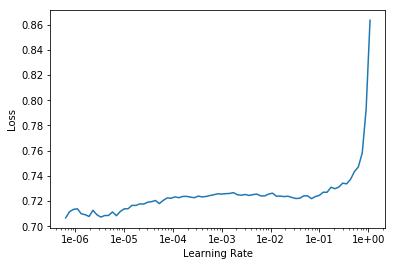

In [74]:
learn.recorder.plot()

In [75]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.693998,0.701424,0.500000,11:00


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [78]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.681568,0.678530,0.570520,12:08


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [82]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.621470,0.786220,0.505720,17:19
1,0.572330,0.554936,0.715640,16:18


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4), 1e-3), moms=(0.8,0.7))

In [86]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([0.2519, 0.7481]))